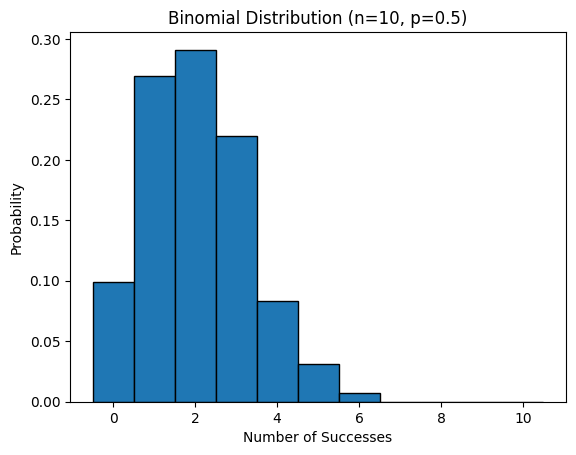

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10  # number of trials
p = 0.2  # probability of success

# Simulate 1000 random samples from a binomial distribution
data = np.random.binomial(n, p, 1000)

# Plot the distribution
plt.hist(data, bins=np.arange(-0.5, n+1, 1), edgecolor='black', density=True)
plt.title('Binomial Distribution (n=10, p=0.5)')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()

### **1. Fitting a Gaussian distribution to stock returns**

In [137]:
2*(100 * 0.25)**0.5

10.0

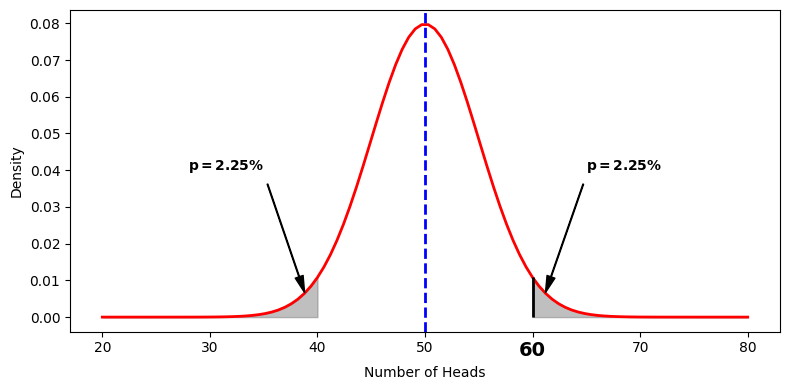

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate x values and Gaussian distribution
x = np.linspace(20, 80, 100)
gaussian = norm.pdf(x, 50, (100 * 0.25)**0.5)

plt.figure(figsize=(8, 4))
# Plot the Gaussian distribution curve
plt.plot(x, gaussian, color='red', linewidth=2, label='Gaussian Distribution')

# Add a vertical dashed line at x=50
plt.axvline(x=50, color='blue', linestyle='--', linewidth=2, label='x = 50')

plt.fill_between(x, gaussian, where=(x <= 40), color='grey', alpha=0.5, label='Shaded Area (x <= 40)')
plt.fill_between(x, gaussian, where=(x >= 60), color='grey', alpha=0.5, label='Shaded Area (x >= 60)')

plt.annotate(
    r'$\mathbf{p = 2.25\%}$',  # Bold text using LaTeX formatting
    xy=(39, 0.005),  # Pointing to near the first shaded area
    xytext=(28, 0.04),  # Start of the arrow (adjusted to be more centered)
    arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=6)  # Thinner arrow
)
# Right arrow pointing to the second grey area
plt.annotate(
    r'$\mathbf{p = 2.25\%}$',  # Bold text using LaTeX formatting
    xy=(61, 0.005),  # Pointing to near the second shaded area
    xytext=(65, 0.04),  # Start of the arrow (adjusted to be more centered)
    arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=6)  # Thinner arrow
)


plt.vlines(x=60, ymin=0, ymax=norm.pdf(60, 50, (100 * 0.25)**0.5), color='black', linestyle='-', linewidth=2, label='Vertical Line at x = 60')

# Add labels and legend
plt.ylabel('Density')
plt.grid(True)
plt.xticks(range(20, 90, 10))
plt.xlabel('Number of Heads')

# Highlight x-tick = 60 in bold with bigger font
plt.xticks(fontsize=10)  # Set default font size for all x-ticks
plt.gca().set_xticks(range(20, 90, 10))  # Manually set the x-ticks

plt.gca().get_xticklabels()[4].set_fontsize(14)  # Make the x-tick for 60 larger
plt.gca().get_xticklabels()[4].set_weight('bold')  # Make the x-tick for 60 bold
plt.tight_layout()
plt.grid(False)
plt.savefig('coin_distrib2.pdf')

# Show the plot
plt.show()


[*********************100%%**********************]  1 of 1 completed


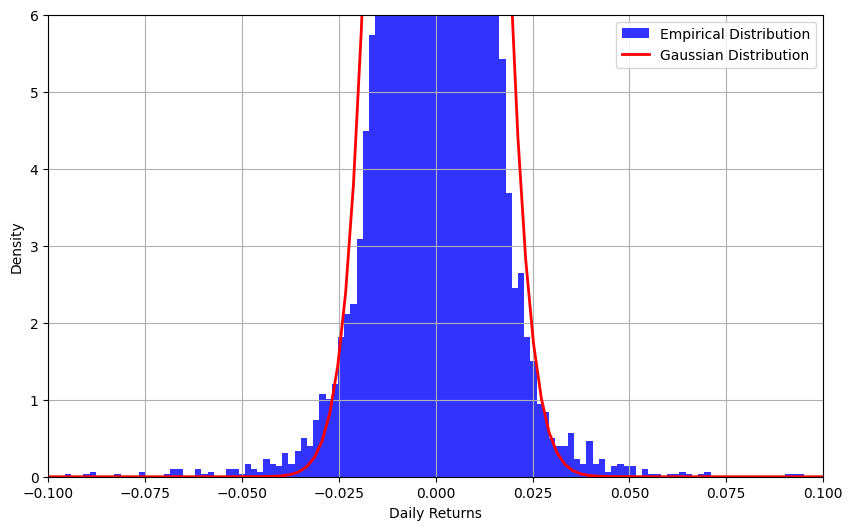

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

# Download historical data for the S&P 500 from Yahoo Finance
ticker = '^GSPC'  # Ticker symbol for the S&P 500 index
data = yf.download(ticker, start='1950-01-01', end='2024-01-01')

# Calculate daily returns
data['Returns'] = data['Close'].pct_change()#.dropna()

# Plot the histogram of empirical returns
plt.figure(figsize=(10, 6))
plt.hist(data['Returns'], bins=200, density=True, alpha=0.8, color='blue', label='Empirical Distribution')

# Fit a Gaussian distribution to the returns
mean = data['Returns'].mean()
std = data['Returns'].std()

# Plot the Gaussian distribution curve
x = np.linspace(-0.1, 0.1, 100)
gaussian = norm.pdf(x, mean, std)
plt.plot(x, gaussian, color='red', linewidth=2, label='Gaussian Distribution')

# Add labels and legend
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.ylim([0,6])
plt.xlim([-0.1, 0.1])
# Show the plot
plt.show()


In [247]:
std

0.009927906093946143

### **2. Fitting a Student-t distribution to stock returns**

[*********************100%%**********************]  1 of 1 completed


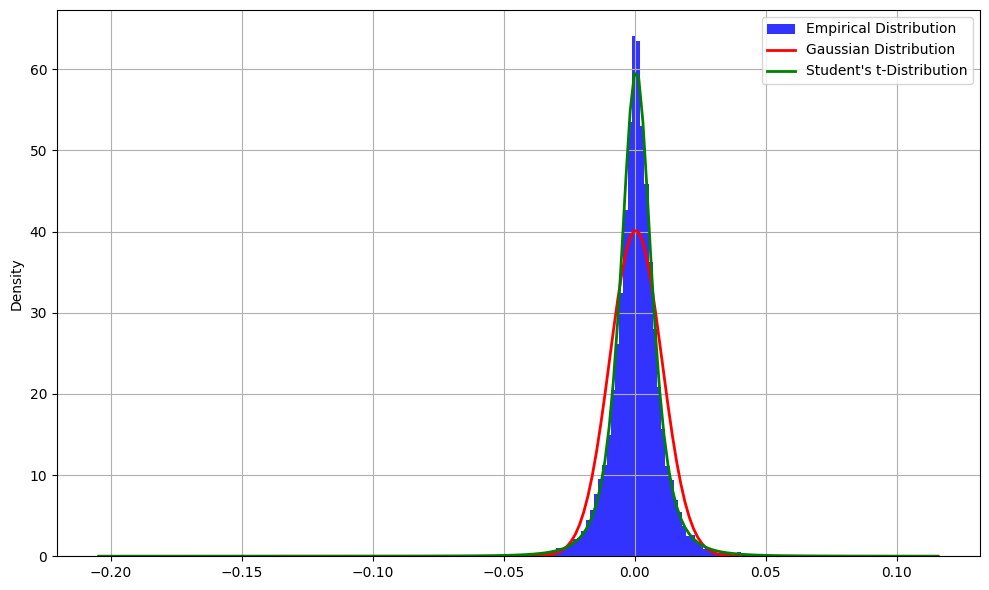

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm, t

# Download historical data for the S&P 500 from Yahoo Finance
# Download historical data for the S&P 500 from Yahoo Finance
ticker = '^GSPC'  # Ticker symbol for the S&P 500 index
data = yf.download(ticker, start='1950-01-01', end='2024-01-01')

# Calculate daily returns and drop missing values
data['Returns'] = data['Close'].pct_change()
data = data.dropna(subset=['Returns'])

# Plot the histogram of empirical returns
plt.figure(figsize=(10, 6))
plt.hist(data['Returns'], bins=200, density=True, alpha=0.8, color='blue', label='Empirical Distribution')

# Fit a Gaussian distribution to the returns
mean = data['Returns'].mean()
std = data['Returns'].std()

# Plot the Gaussian distribution curve
x = np.linspace(data['Returns'].min(), data['Returns'].max(), 200)
gaussian = norm.pdf(x, mean, std)
plt.plot(x, gaussian, color='red', linewidth=2, label='Gaussian Distribution')

# Fit a Student's t-distribution to the returns
t_fit_params = t.fit(data['Returns'])
t_dist = t.pdf(x, df=t_fit_params[0], loc=t_fit_params[1], scale=t_fit_params[2])
plt.plot(x, t_dist, color='green', linewidth=2, label="Student's t-Distribution")

# Add labels and legend
plt.ylabel('Density')
plt.legend()
plt.grid(True)
#plt.ylim([0,1.5])
#plt.xlim([-0.2, 0.0])
plt.tight_layout()

plt.savefig("test_stat10.pdf")
# Show the plot
plt.show()


[*********************100%%**********************]  1 of 1 completed


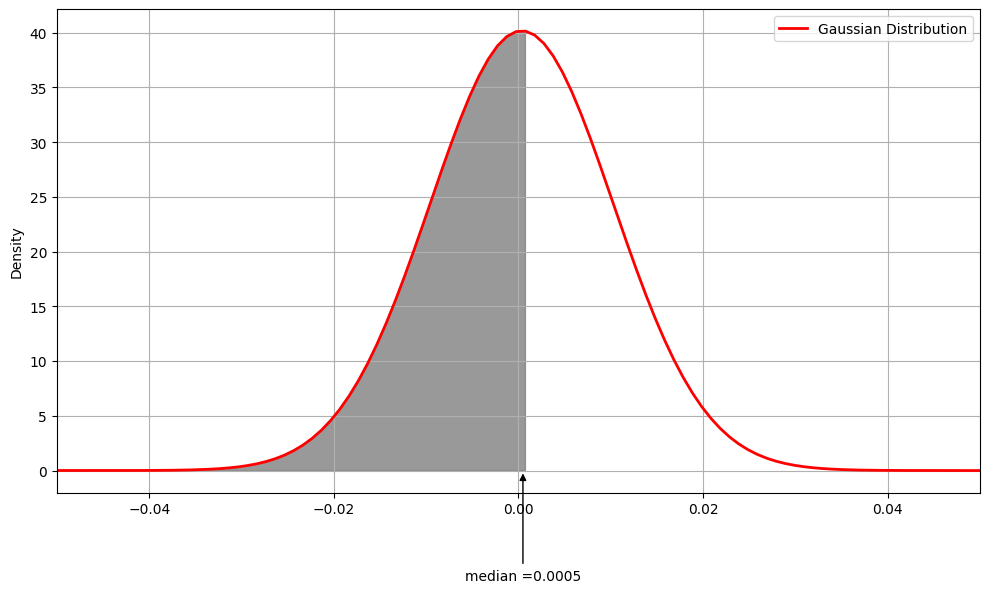

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm, t

# Download historical data for the S&P 500 from Yahoo Finance
ticker = '^GSPC'  # Ticker symbol for the S&P 500 index
data = yf.download(ticker, start='1950-01-01', end='2024-01-01')

# Calculate daily returns and drop missing values
data['Returns'] = data['Close'].pct_change()
data = data.dropna(subset=['Returns'])

# Plot the histogram of empirical returns
plt.figure(figsize=(10, 6))
#plt.hist(data['Returns'], bins=200, density=True, alpha=0.8, color='blue', label='Empirical Distribution')

# Fit a Gaussian distribution to the returns
mean = data['Returns'].mean()
std = data['Returns'].std()

# Define x values for plotting
x = np.linspace(-0.15, 0.05, 200)

# Plot the Gaussian distribution curve
gaussian = norm.pdf(x, mean, std)
plt.plot(x, gaussian, color='red', linewidth=2, label='Gaussian Distribution')

# Compute the median (for Gaussian, median = mean)
median = data['Returns'].median()
median = data['Returns'].quantile(0.5)
var = data['Returns'].quantile(0.01)
# Shade the area under the Gaussian curve to the left of the median
plt.fill_between(x, 0, gaussian, where=(x <= median+0.0003), color='grey', alpha=0.8)

# Add an annotation to identify the median on the x-axis
plt.annotate('median =' +str(median.round(4)), xy=(median, 0), xytext=(median, -10),
             arrowprops=dict(facecolor='black', arrowstyle='-|>'),
             horizontalalignment='center')

# Adjust the y-limits to make space for the annotation
#plt.ylim([-0.5, 5])

# Add labels and legend
#plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.xlim([-0.05, 0.05])

plt.tight_layout()
plt.savefig("test_stat20.pdf")
plt.show()


In [65]:
data['Returns'].quantile(0.05)

-0.014714463309780568

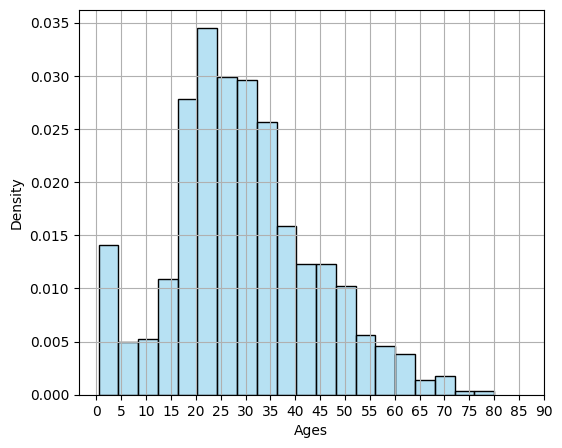

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Extract the 'age' column, dropping missing values
ages = titanic['age'].dropna()

# Create a histogram to visualize the empirical distribution of ages
plt.figure(figsize=(6, 5))
sns.histplot(ages, bins=20, kde=False, stat='density', color='skyblue', alpha=0.6)
plt.xlabel('Ages')
plt.ylabel('Density')
plt.grid(True)
plt.xticks(range(0, 91, 5))  # Set x-ticks for better readability
plt.savefig("test_stat11.pdf")

plt.show()


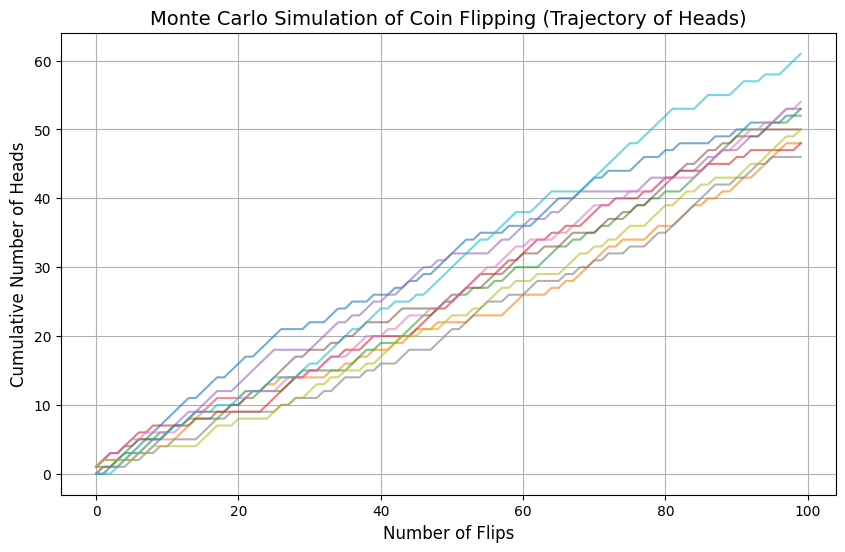

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo Simulation for Coin Flipping
def coin_flip_simulation(num_flips, num_trials):
    # Simulate the flips (0 = tails, 1 = heads)
    trials = np.random.randint(0, 2, (num_trials, num_flips))
    
    # Calculate the cumulative number of heads for each trial
    cumulative_heads = np.cumsum(trials, axis=1)
    
    return cumulative_heads

# Parameters
num_flips = 100  # Number of flips per trial
num_trials = 1000  # Number of Monte Carlo trials

# Perform the simulation
cumulative_heads = coin_flip_simulation(num_flips, num_trials)

# Visualization
plt.figure(figsize=(10, 6))

# Plotting some random trials to show individual trajectories
for i in range(10):  # Show 10 random trials
    plt.plot(cumulative_heads[i], alpha=0.6)

# Add labels and title
plt.title('Monte Carlo Simulation of Coin Flipping (Trajectory of Heads)', fontsize=14)
plt.xlabel('Number of Flips', fontsize=12)
plt.ylabel('Cumulative Number of Heads', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


### **Testing mean housing price**

In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import scipy.stats as stats

# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
housing = data.frame

# Create a column for 'proximity to ocean' (we will create a fictional one for demonstration purposes)
# Let's assume: median_income > 4 indicates near the ocean, otherwise inland
housing['proximity_to_ocean'] = housing['MedInc'].apply(lambda x: '<1H OCEAN' if x > 4 else 'INLAND')

# Split the data into two groups based on proximity to ocean
ocean_prices = housing[housing['proximity_to_ocean'] == '<1H OCEAN']['MedHouseVal']
inland_prices = housing[housing['proximity_to_ocean'] == 'INLAND']['MedHouseVal']

# Perform a two-sample t-test to compare house prices
t_stat, p_value = stats.ttest_ind(ocean_prices, inland_prices, equal_var=False)

# Display the results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: 85.5407
P-value: 0.0000


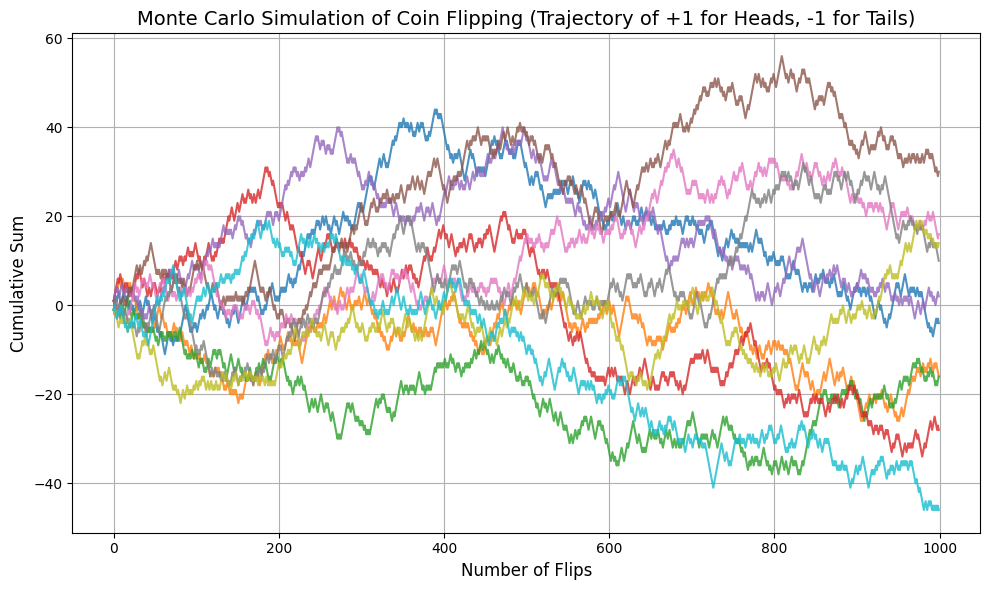

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo Simulation for Coin Flipping (+1 for heads, -1 for tails)
def coin_flip_simulation(num_flips, num_trials):
    # Simulate the flips (1 = heads, -1 = tails)
    trials = np.random.choice([-1, 1], size=(num_trials, num_flips))
    
    # Calculate the cumulative sum (trajectory) for each trial
    cumulative_trajectory = np.cumsum(trials, axis=1)
    
    return cumulative_trajectory

# Parameters
num_flips = 1000  # Number of flips per trial
num_trials = 1000  # Number of Monte Carlo trials

# Perform the simulation
cumulative_trajectory = coin_flip_simulation(num_flips, num_trials)

# Visualization
plt.figure(figsize=(10, 6))

# Plotting some random trials to show individual trajectories
for i in range(10):  # Show 10 random trials
    plt.plot(cumulative_trajectory[i], alpha=0.8)

# Add labels and title
plt.title('Monte Carlo Simulation of Coin Flipping (Trajectory of +1 for Heads, -1 for Tails)', fontsize=14)
plt.xlabel('Number of Flips', fontsize=12)
plt.ylabel('Cumulative Sum', fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.savefig("simul_coin.pdf")
plt.show()


In [6]:
# Calculate the median values for MedInc and HouseAge
median_income = housing['MedInc'].median()
median_age = housing['HouseAge'].median()

# Group the data based on income level
housing['Income Level'] = housing['MedInc'].apply(lambda x: 'High Income' if x > median_income else 'Low Income')

# Group the data based on house age
housing['House Age Category'] = housing['HouseAge'].apply(lambda x: 'Newer Houses' if x < median_age else 'Older Houses')

# Split the house prices based on income level and house age category
high_income_prices = housing[housing['Income Level'] == 'High Income']['MedHouseVal']
low_income_prices = housing[housing['Income Level'] == 'Low Income']['MedHouseVal']

newer_house_prices = housing[housing['House Age Category'] == 'Newer Houses']['MedHouseVal']
older_house_prices = housing[housing['House Age Category'] == 'Older Houses']['MedHouseVal']

# Perform two-sample t-tests on house prices for both characteristics
t_stat_income, p_value_income = stats.ttest_ind(high_income_prices, low_income_prices, equal_var=True)
t_stat_age, p_value_age = stats.ttest_ind(newer_house_prices, older_house_prices, equal_var=True)

# Display the results
print(f"T-test for High vs. Low Income Areas:")
print(f"T-statistic: {t_stat_income:.4f}, P-value: {p_value_income:.4f}\n")

print(f"T-test for Newer vs. Older Houses:")
print(f"T-statistic: {t_stat_age:.4f}, P-value: {p_value_age:.4f}")


T-test for High vs. Low Income Areas:
T-statistic: 86.3631, P-value: 0.0000

T-test for Newer vs. Older Houses:
T-statistic: -9.3175, P-value: 0.0000


/var/folders/bs/5f0ys9r13_l1yqx_3qv0ncg80000gn/T/ipykernel_24654/3397417647.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income Level', y='MedHouseVal', data=housing, palette='Set2')
/var/folders/bs/5f0ys9r13_l1yqx_3qv0ncg80000gn/T/ipykernel_24654/3397417647.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='House Age Category', y='MedHouseVal', data=housing, palette='Set3')


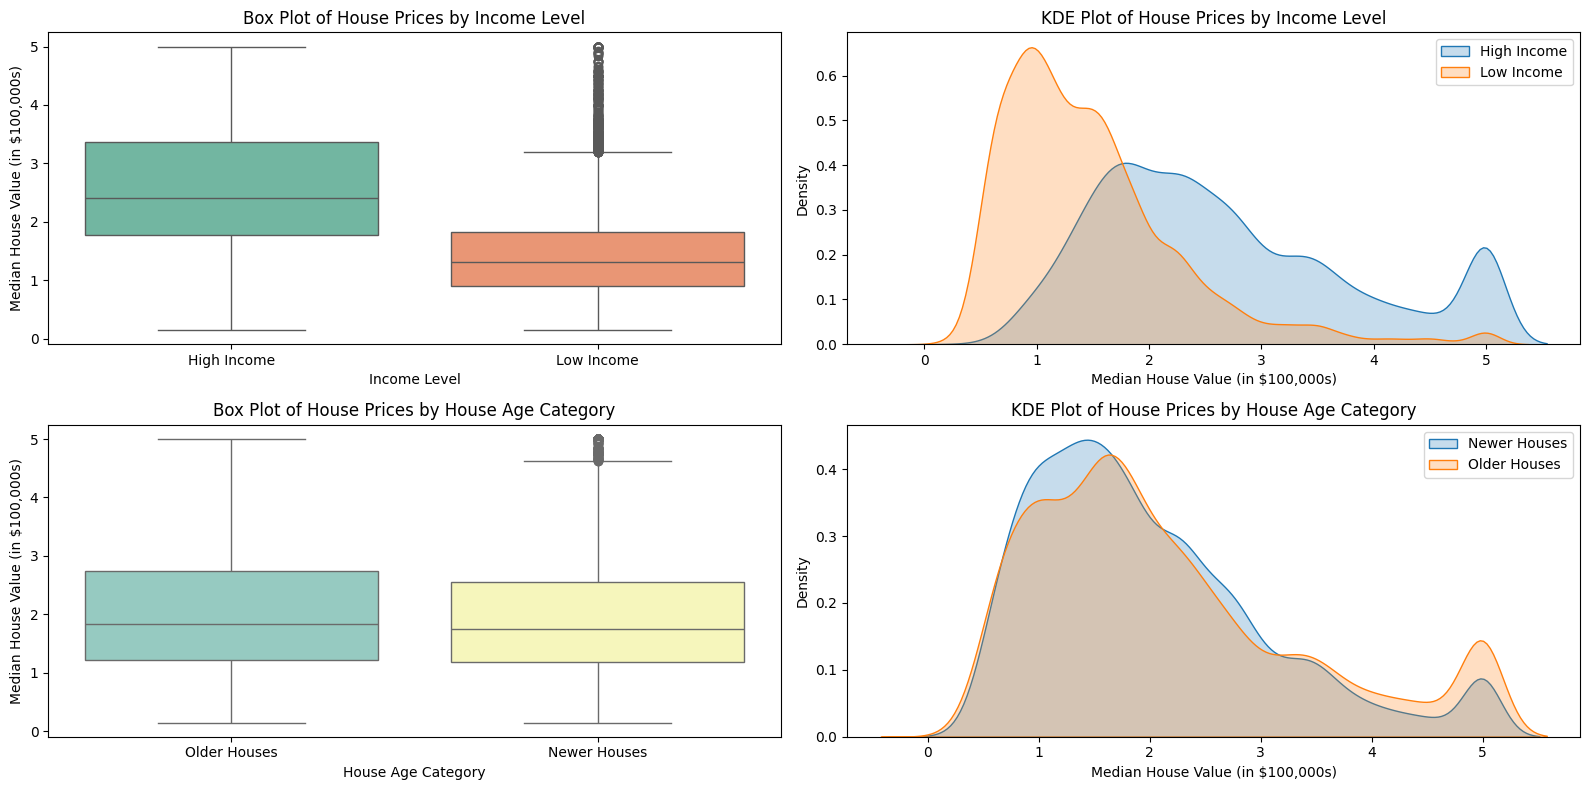

In [7]:
# Set up the plotting area
plt.figure(figsize=(16, 8))

# Box plot to compare house prices based on income level
plt.subplot(2, 2, 1)
sns.boxplot(x='Income Level', y='MedHouseVal', data=housing, palette='Set2')
plt.title('Box Plot of House Prices by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Median House Value (in $100,000s)')

# KDE plot to visualize the distribution of house prices for income levels
plt.subplot(2, 2, 2)
sns.kdeplot(data=high_income_prices, label='High Income', fill=True)
sns.kdeplot(data=low_income_prices, label='Low Income', fill=True)
plt.title('KDE Plot of House Prices by Income Level')
plt.xlabel('Median House Value (in $100,000s)')
plt.ylabel('Density')
plt.legend()

# Box plot to compare house prices based on house age category
plt.subplot(2, 2, 3)
sns.boxplot(x='House Age Category', y='MedHouseVal', data=housing, palette='Set3')
plt.title('Box Plot of House Prices by House Age Category')
plt.xlabel('House Age Category')
plt.ylabel('Median House Value (in $100,000s)')

# KDE plot to visualize the distribution of house prices for house age categories
plt.subplot(2, 2, 4)
sns.kdeplot(data=newer_house_prices, label='Newer Houses', fill=True)
sns.kdeplot(data=older_house_prices, label='Older Houses', fill=True)
plt.title('KDE Plot of House Prices by House Age Category')
plt.xlabel('Median House Value (in $100,000s)')
plt.ylabel('Density')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


In [8]:
# Calculate the median values for Latitude and Longitude
median_latitude = housing['Latitude'].median()
median_longitude = housing['Longitude'].median()

# Group the data based on latitude and longitude
housing['Latitude Category'] = housing['Latitude'].apply(lambda x: 'North' if x > median_latitude else 'South')
housing['Longitude Category'] = housing['Longitude'].apply(lambda x: 'East' if x > median_longitude else 'West')

# Split the house prices based on latitude and longitude
north_prices = housing[housing['Latitude Category'] == 'North']['MedHouseVal']
south_prices = housing[housing['Latitude Category'] == 'South']['MedHouseVal']

east_prices = housing[housing['Longitude Category'] == 'East']['MedHouseVal']
west_prices = housing[housing['Longitude Category'] == 'West']['MedHouseVal']

# Perform two-sample t-tests on house prices for both latitude and longitude
t_stat_lat, p_value_lat = stats.ttest_ind(north_prices, south_prices, equal_var=False)
t_stat_lon, p_value_lon = stats.ttest_ind(east_prices, west_prices, equal_var=False)

# Display the results
print(f"T-test for North vs. South Latitude:")
print(f"T-statistic: {t_stat_lat:.4f}, P-value: {p_value_lat:.4f}\n")

print(f"T-test for East vs. West Longitude:")
print(f"T-statistic: {t_stat_lon:.4f}, P-value: {p_value_lon:.4f}")


T-test for North vs. South Latitude:
T-statistic: -19.4711, P-value: 0.0000

T-test for East vs. West Longitude:
T-statistic: 8.7204, P-value: 0.0000


/var/folders/bs/5f0ys9r13_l1yqx_3qv0ncg80000gn/T/ipykernel_24654/445245505.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Latitude Category', y='MedHouseVal', data=housing, palette='Set2')
/var/folders/bs/5f0ys9r13_l1yqx_3qv0ncg80000gn/T/ipykernel_24654/445245505.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Longitude Category', y='MedHouseVal', data=housing, palette='Set3')


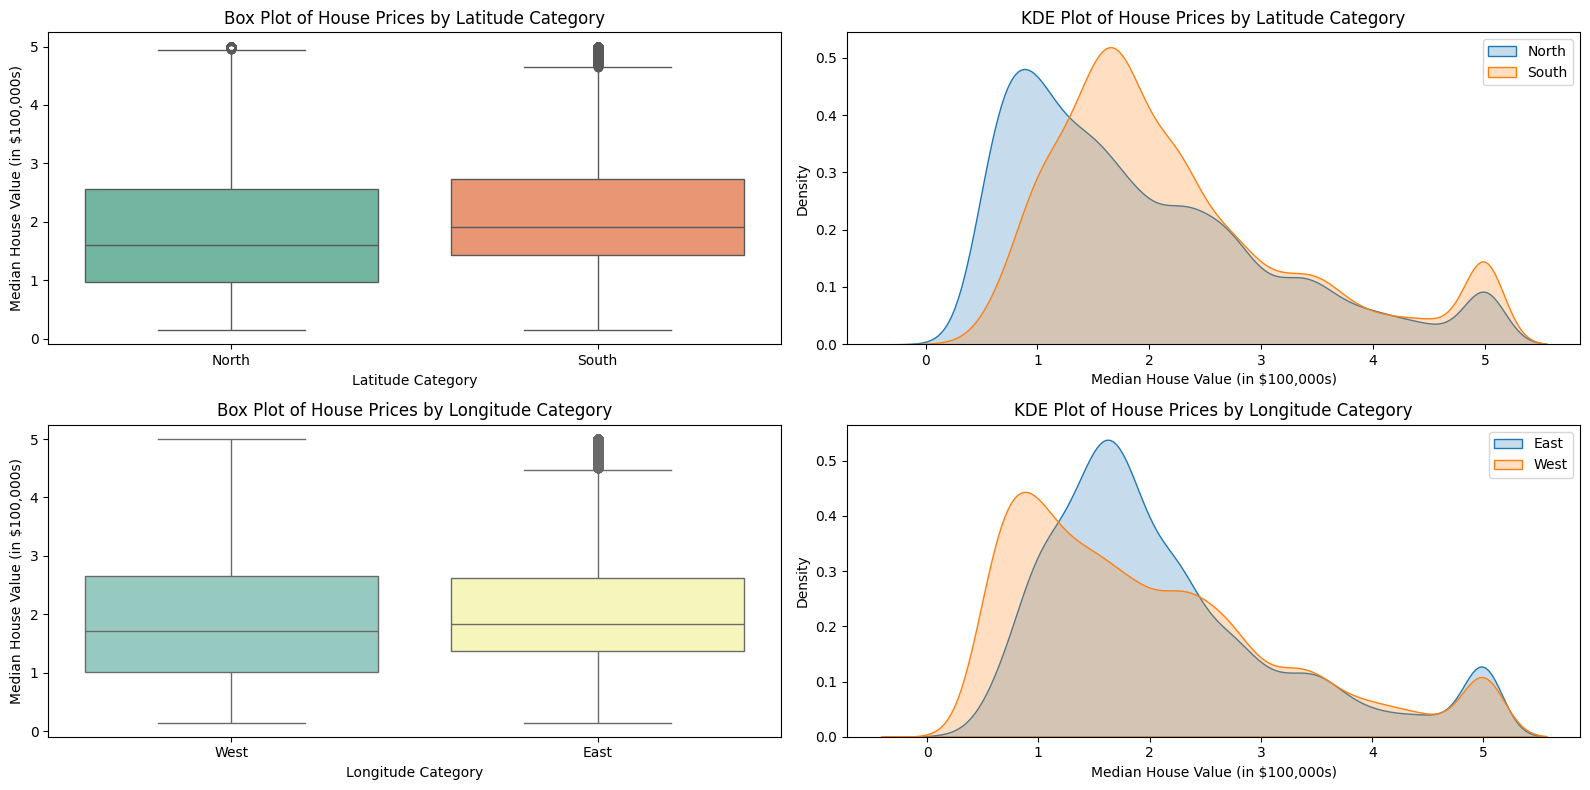

In [9]:
# Set up the plotting area
plt.figure(figsize=(16, 8))

# Box plot to compare house prices based on latitude
plt.subplot(2, 2, 1)
sns.boxplot(x='Latitude Category', y='MedHouseVal', data=housing, palette='Set2')
plt.title('Box Plot of House Prices by Latitude Category')
plt.xlabel('Latitude Category')
plt.ylabel('Median House Value (in $100,000s)')

# KDE plot to visualize the distribution of house prices by latitude category
plt.subplot(2, 2, 2)
sns.kdeplot(data=north_prices, label='North', fill=True)
sns.kdeplot(data=south_prices, label='South', fill=True)
plt.title('KDE Plot of House Prices by Latitude Category')
plt.xlabel('Median House Value (in $100,000s)')
plt.ylabel('Density')
plt.legend()

# Box plot to compare house prices based on longitude
plt.subplot(2, 2, 3)
sns.boxplot(x='Longitude Category', y='MedHouseVal', data=housing, palette='Set3')
plt.title('Box Plot of House Prices by Longitude Category')
plt.xlabel('Longitude Category')
plt.ylabel('Median House Value (in $100,000s)')

# KDE plot to visualize the distribution of house prices by longitude category
plt.subplot(2, 2, 4)
sns.kdeplot(data=east_prices, label='East', fill=True)
sns.kdeplot(data=west_prices, label='West', fill=True)
plt.title('KDE Plot of House Prices by Longitude Category')
plt.xlabel('Median House Value (in $100,000s)')
plt.ylabel('Density')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()
